 ## Set up
 Go to `Edit` -> `Notebook Setting`, make sure that you are using Python3 and GPU. The following command is to check if there is a GPU avaliable. 

 How to use Colab?

1.   https://www.geeksforgeeks.org/how-to-use-google-colab/
2.  https://colab.research.google.com/notebooks/welcome.ipynb


 




In [1]:
# It should print out some info with NVIDIA...
!nvidia-smi

Sun Mar  1 01:34:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Grading scheme
The deadline for HW2 is **March 2nd, 2020**. 10% off for each day. After three days, the assignment will be given a score of zero.

You should finish all TODO parts and keep the output cells, and answer the questions. The full credit is 10 points in total. 



*   Part A: Linear Regression (1 point); PartA2 (1 point). 
*   Part B: RNN (3 ponts); LSTM (1 point); Question (1 point).
*   Part C: Loading dataset (1 point); Model training (1 point); Question (1 point).

   



# PyTorch Basics

## Linear regression
Let's start with an example. 

We define a linear function: $y=5x+1.2$, our work now is to see if a simple linear layer can learn the function. 
We fist generate a number of data points: $(x,y)$, using numpy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


number_of_data_point = 50

# create sample data for training
x_values = np.linspace(0,2,number_of_data_point)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

# generate sample y data, 
# y_values = [math.sin(x)+ 0.2 for x in x_values]
y_values = [5*x+ 1.2 for x in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

# print out the shape
print (x_train.shape)
# print (x_train)
# print (y_train)

(50, 1)


### Now start using Pytorch!
Now let's create the first "neural network" class. 

We create a `linearRegression` class, this is a basic Pytorch Module.
A Pytorch Module is supposed to have two funcitons: `__init___()`: we put all components there, like all the layers; `forward()`: we define the calculation flow in this method.  

In [0]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Define inputs and outputs

In [0]:
# our input and output are just a scalar, so the dimension should be 1 for both.
inputDim = 1   
outputDim = 1   
learningRate = 0.01 
epochs = 100

# our model instance
model = linearRegression(inputDim, outputDim)


##### For GPU #######
if torch.cuda.is_available():
    model.cuda()


## Loss function and optimizer

Now it is time to define a loss function and an optimizer.  Think about what loss functions to use? And which optimizer? Fill in the code.

References:

https://pytorch.org/docs/stable/optim.html
https://pytorch.org/docs/stable/nn.html



In [0]:
## TODO: fill in the loss function and optimizer
import torch.nn as nn
import torch.optim as optim
criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=learningRate)
# optimizer = optim.SGD(model.parameters(), lr=learningRate)
optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=0.9)



Start training now...

In [6]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(45.0235, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 45.02349853515625
tensor(41.2534, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 41.25338363647461
tensor(34.7014, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 34.70137405395508
tensor(26.6590, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 26.659048080444336
tensor(18.4480, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 18.448022842407227
tensor(11.1939, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 11.193936347961426
tensor(5.6759, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 5.675943374633789
tensor(2.2620, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 2.262006998062134
tensor(0.9244, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.9243513345718384
tensor(1.3173, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 1.3172560930252075
tensor(2.8925, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, loss 2.892

Print...

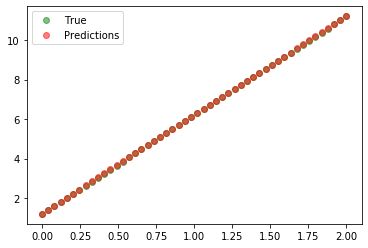

In [7]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    # print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True', alpha=0.5)
plt.plot(x_train, predicted, 'ro', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Improving the model

Now it is your time to improve the model: how can the prediction be better adapted to the true values? Does two linears help? Try it out!
(Add ref)

In [0]:
## TODO: make your regression class
class myRegression(torch.nn.Module):
    def __init__(self,inputSize, outputSize):
        super(myRegression, self).__init__()
        #...
        self.linear1 = torch.nn.Linear(inputSize, inputSize)
        self.linear2 = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        #...
        out1 = self.linear1(x)
        out = self.linear2(out1)
        return out

In [0]:
# apply your regression class
model = myRegression(inputDim, outputDim)
criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=learningRate)
optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=0.9)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [10]:
# start training
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(60.0251, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 60.02509689331055
tensor(57.0901, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 57.09014892578125
tensor(51.9598, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 51.95983123779297
tensor(45.0429, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 45.04291915893555
tensor(35.9589, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 35.958919525146484
tensor(23.9849, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 23.984949111938477
tensor(10.2066, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 10.20655632019043
tensor(1.8700, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 1.8700045347213745
tensor(10.0554, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 10.055380821228027
tensor(23.6452, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 23.645198822021484
tensor(16.7780, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, loss 1

[[ 1.1738025]
 [ 1.3777344]
 [ 1.5816662]
 [ 1.7855984]
 [ 1.9895302]
 [ 2.1934621]
 [ 2.3973942]
 [ 2.601326 ]
 [ 2.8052578]
 [ 3.0091896]
 [ 3.2131217]
 [ 3.4170535]
 [ 3.6209855]
 [ 3.8249173]
 [ 4.0288496]
 [ 4.2327814]
 [ 4.436713 ]
 [ 4.640645 ]
 [ 4.844577 ]
 [ 5.048509 ]
 [ 5.252441 ]
 [ 5.4563727]
 [ 5.6603045]
 [ 5.864237 ]
 [ 6.0681686]
 [ 6.2721004]
 [ 6.4760323]
 [ 6.679964 ]
 [ 6.8838964]
 [ 7.087828 ]
 [ 7.29176  ]
 [ 7.495692 ]
 [ 7.6996236]
 [ 7.9035554]
 [ 8.107488 ]
 [ 8.3114195]
 [ 8.515351 ]
 [ 8.719283 ]
 [ 8.923215 ]
 [ 9.127147 ]
 [ 9.3310795]
 [ 9.535011 ]
 [ 9.738943 ]
 [ 9.942875 ]
 [10.146807 ]
 [10.350739 ]
 [10.554671 ]
 [10.758603 ]
 [10.962535 ]
 [11.166467 ]]


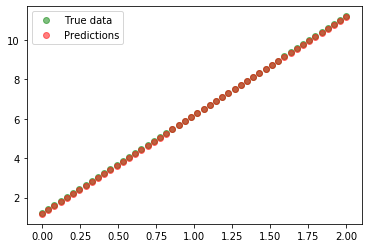

In [11]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, 'ro', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# Part A2
Once you have sshed into the Zoo cluster, copy the homework files to your hidden directory under Homework2 folder.
`cp -r /home/classes/cs477/assignments/2020-Homework2 ~/hidden/<YOUR_PIN>`

Apply the virtualenv using:
`source /home/classes/cs477/venvs/hw2/bin/activate`

In this part you will fill the code in `PartA2.py`.  

## Naïve Bayes
Time estimate to run correct implementation: 5 minutes
In this part of the assignment, you’ll be training a Naïve Bayes Classifier on the IMDb Movie Review Database. You’ll be using some of the features that come built into the sklearn library to quickly get a Multinomial Naïve Bayes Classifier running. 

1. To process the movie reviews, we’ll want to convert them into a matrix of word counts for each possible word. We recommend that you check out the CountVectorizer class in sklearn. You can use the nltk word tokenizer as well. Your code for this function should be very brief!
2. We’ll train and test a Naïve Bayes Classifier on our dataset. Using sklearn’s MultinomialNB() class, fit a classifier to the reviews and labels of the training set (x_train and y_train). Then return a set of predictions for the test set of reviews (x_test)

The result we got with a correct implementation was around:
Accuracy: 0.660000
(Around this number, may be different). 

Note that it may take a few minutes to run the script. 


Fill the code in `PartA2.py`.  

*Reference*: https://scikit-learn.org/stable/datasets/index.html#datasets




### **Submission**
You have to submit the code (.ipynb) file, and answer the questions in a Text cell (click `+Text` button to do so), make sure that your answer is in the LAST Text cell. Also make sure that your .ipynb contains all the outputs, i.e., the plots.  You can also save your answer in a `README.txt` file and submit. 


**Questions:**
1. What improvements did you try in the `myRegression` class?  Describe the structure. And do you think it improved? 
2. Do you think only using `nn.Linear` layers can learn this function: $y=sin(x)$? Why or why not?


## Submission

Now that you have completed the assignment, follow the steps below to submit your aissgnment:
1. Click __Runtime__  > __Run all__ to generate the output for all cells in the notebook.
2. Save the notebook ( __File__ >  __Save__) with the output from all the cells in the notebook by click __File__ > __Download .ipynb__.
3. Put the .ipynb file and `README.txt` (if you have one) under your hidden directory on the Zoo server `~/hidden/<YOUR_PIN>/Homework2/`.
5. As a final step, run a script that will set up the permissions to your homework files, so we can access and run your code to grade it. Make sure the command be;pw runs without errors, and do not make any changes or run the code again. If you do run the code again or make any changes, you need to run the permissions script again. Submissions without the correct permissions may incur some grading penalty.
`/home/classes/cs477/bash_files/hw2_set_permissions.sh <YOUR_PIN>`. **Note** that your `PartA2.py` should also be included in your folder.